Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 311
Code Title: | Computational Thinking with Python
Summer | 2024
| <hr></hr> | <hr></hr>
<u>**Hands-on Activity No. 9.2**</u> | <u>**Customized Visualizations using Seaborn**</u>
**Name** | Sumilang, Kenneth
**Section** | CPE32S1
**Date Performed**: | 7/9/24
**Date Submitted**: | 7/9/24
**Instructor**: |Engr. Roman M. Richard


# Procedure

## 9.2.1 Introduction to Seaborn

### Introduction to Seaborn

#### About the Data

In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the `stock_analysis` package)
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

In [3]:
#### Setup


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('earthquakes.csv')

#### Categorical data

A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.

In [4]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


#### stripplot()

The `stripplot()` function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a column of our data (with the `hue` parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude was; however, it isn't too easy to see the density of the points due to overlap:

<Axes: xlabel='magType', ylabel='mag'>

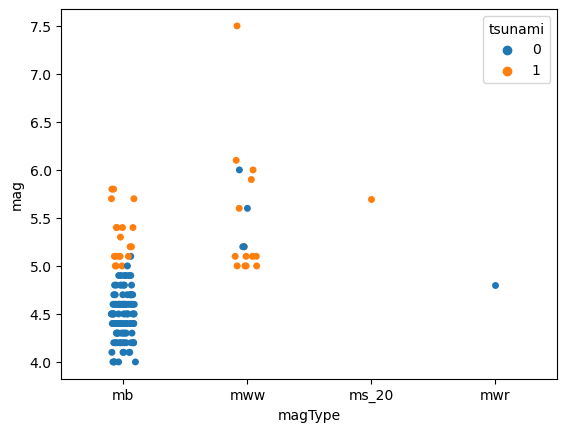

In [5]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

#### swarmplot()

The bee swarm plot helps address this issue by keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType:

<Axes: xlabel='magType', ylabel='mag'>

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


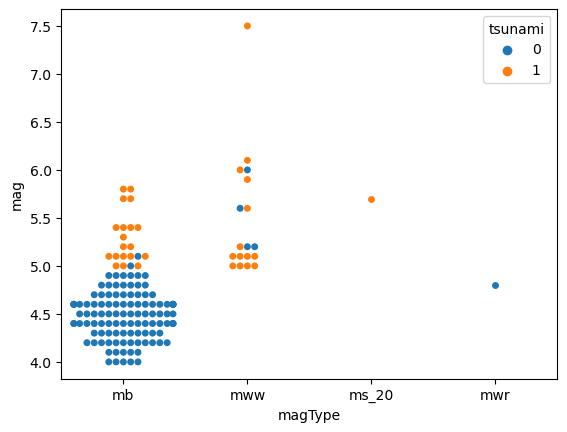

In [6]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

#### Correlations and Heatmaps

An easier way to create a correlation matrix is to use seaborn:

<Axes: >

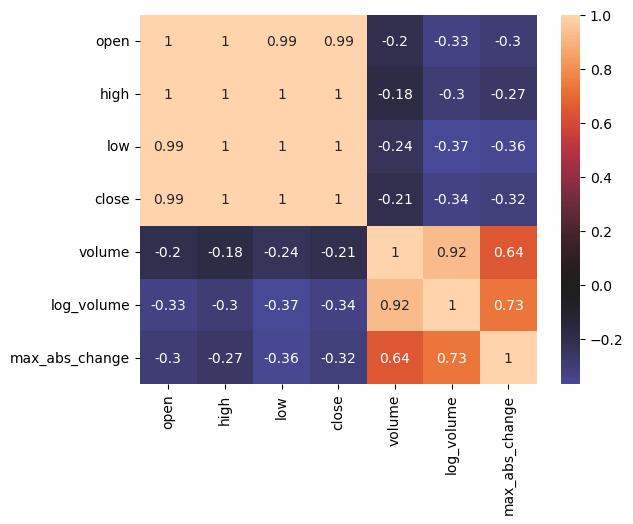

In [7]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, center=0
)

#### pairplot()

The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


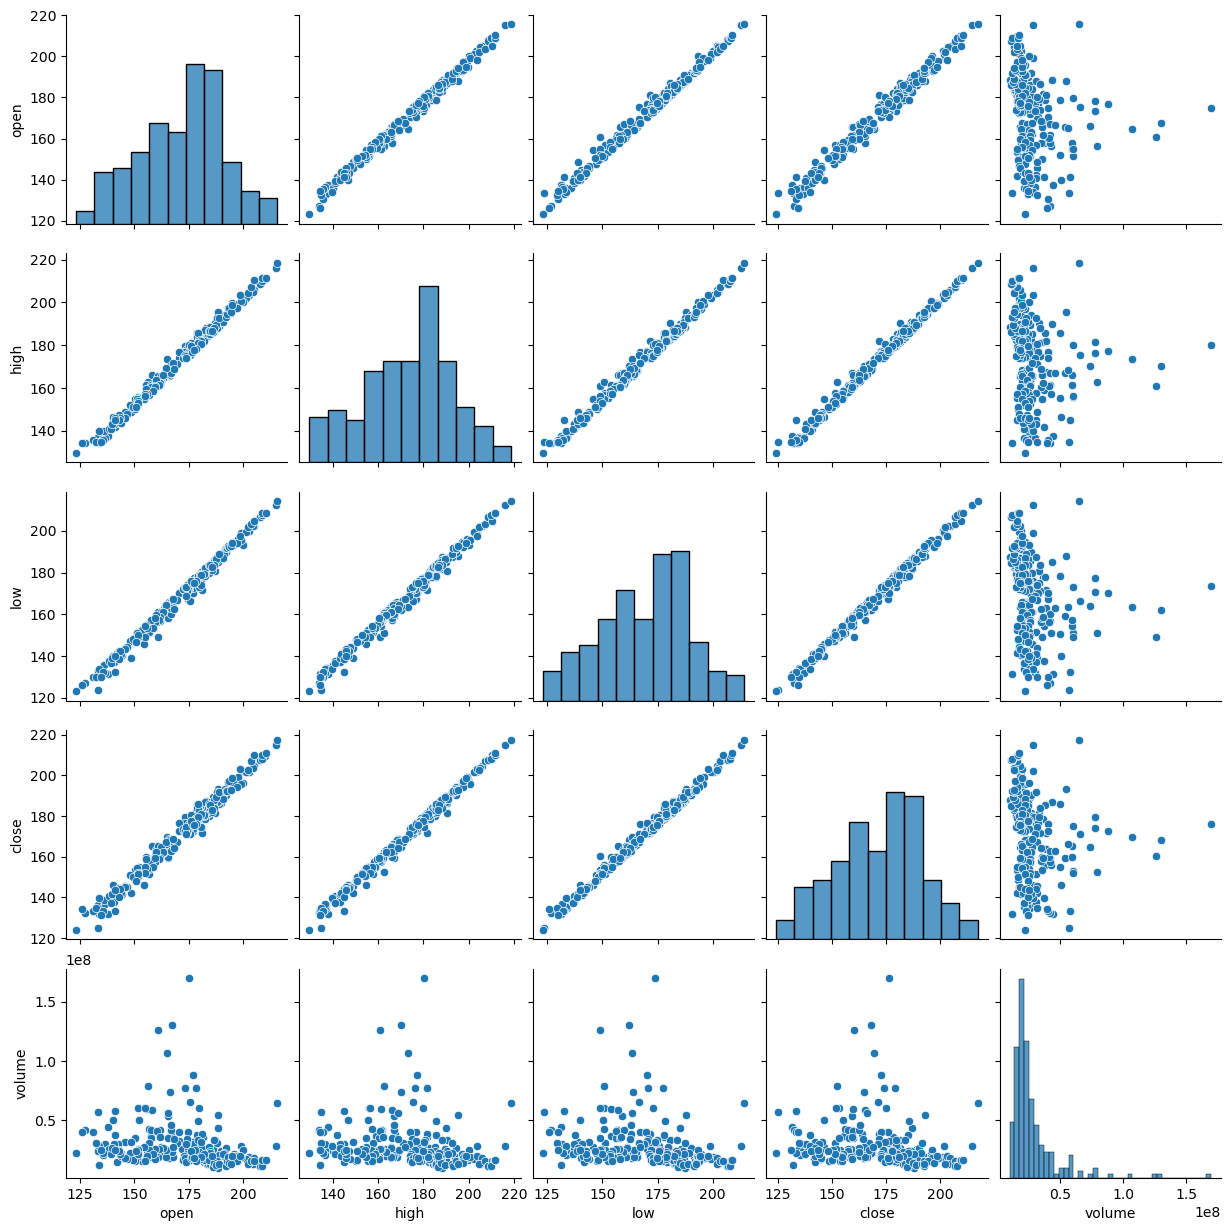

In [8]:
sns.pairplot(fb)

Just as with pandas, we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the same shape):

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


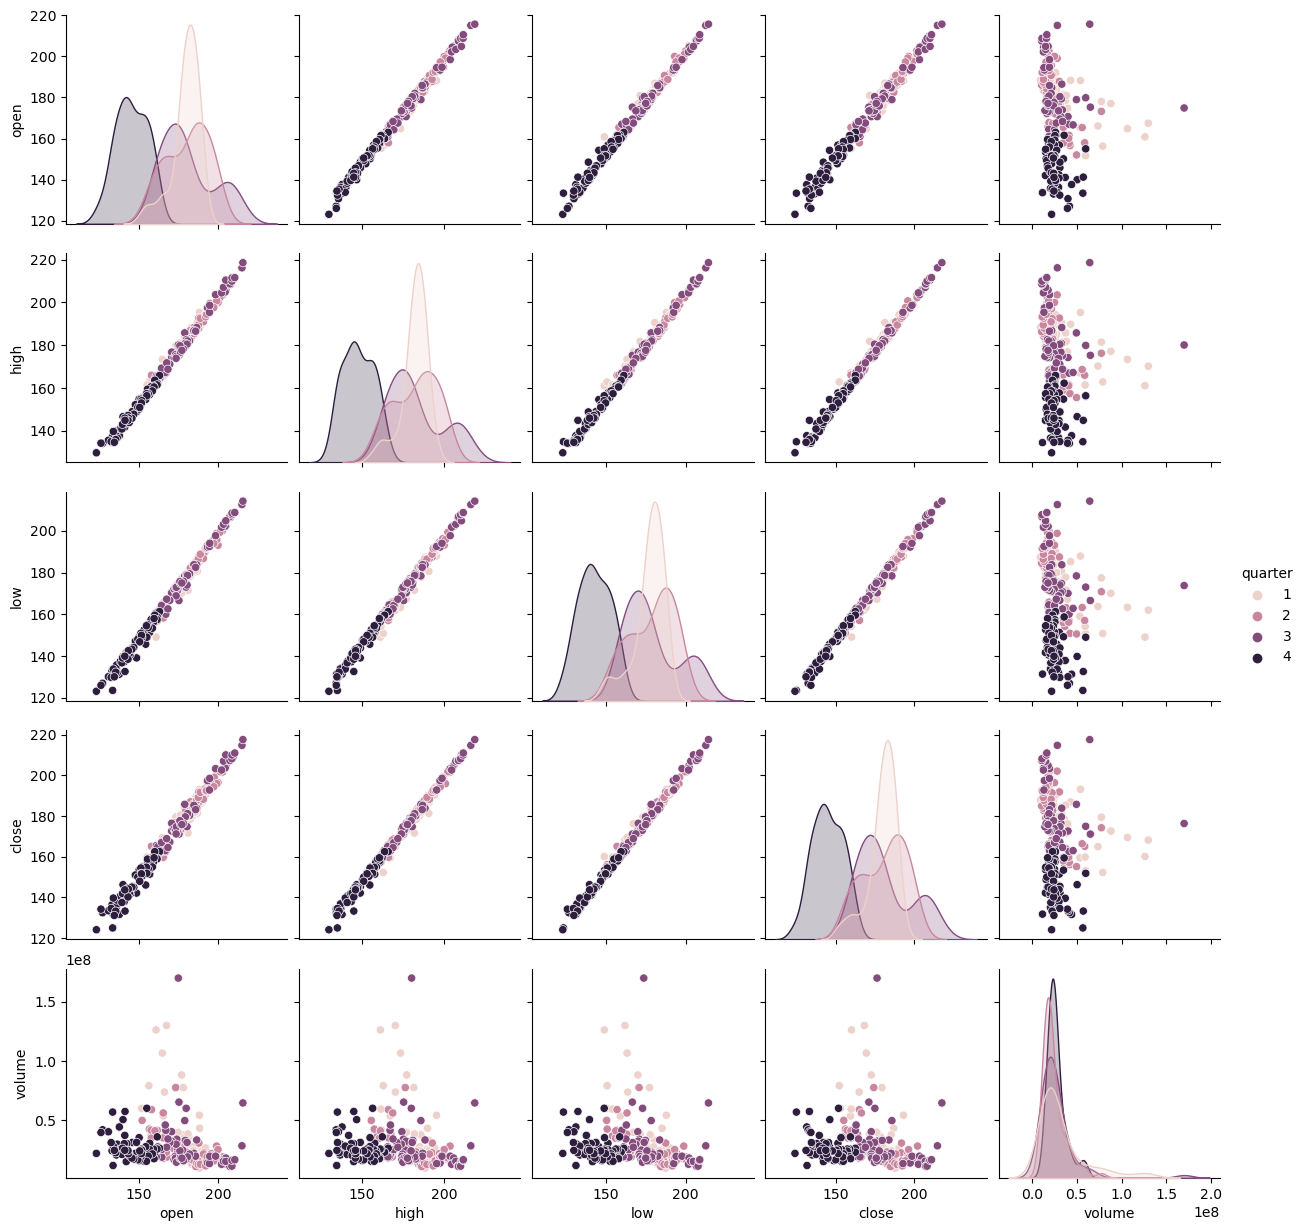

In [9]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

#### jointplot()

The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

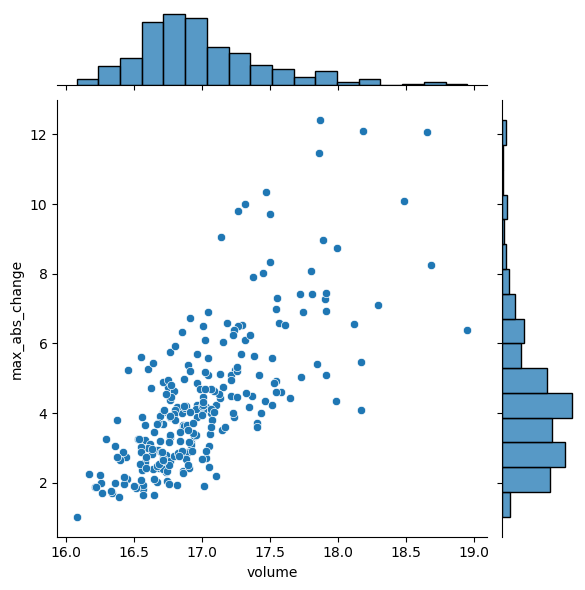

In [10]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

By changing the `kind` argument, we can change how the center of the plot is displayed. For example, we can pass `kind='hex'` for hexbins:

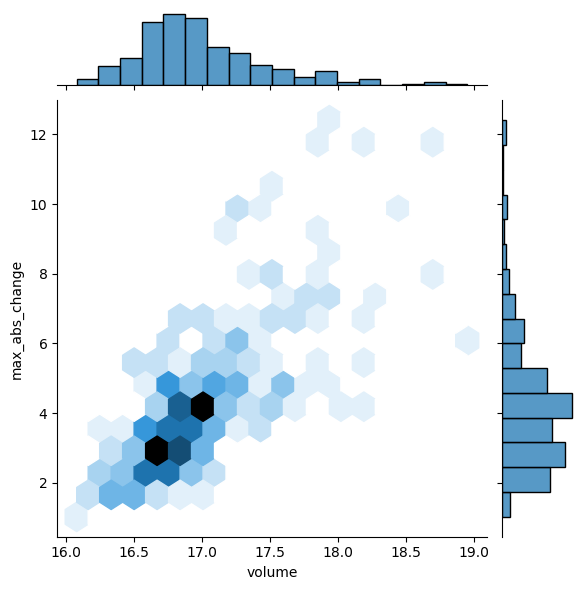

In [11]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we specify `kind='reg'`, we get a regression line in the center and KDEs on the sides:

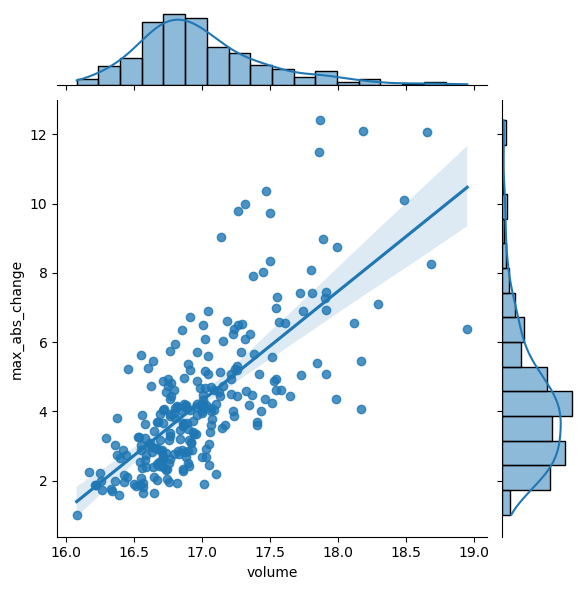

In [12]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

If we pass `kind='resid'`, we get the residuals from the aforementioned regression:

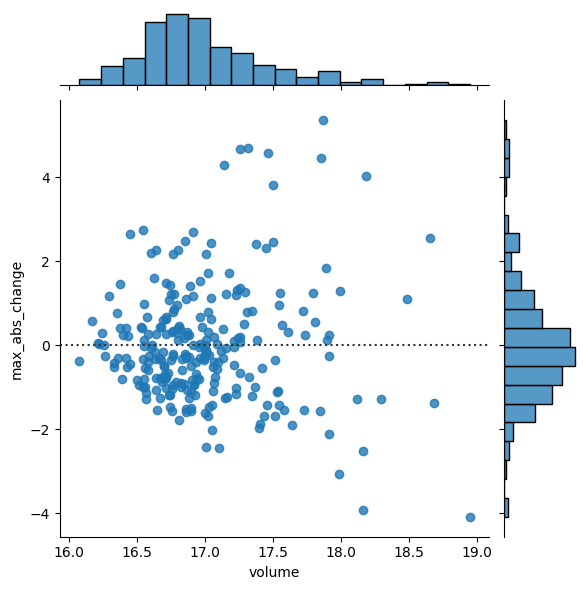

In [13]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Finally, if we pass `kind='kde'`, we get a contour plot of the joint density estimate with KDEs along the sides:

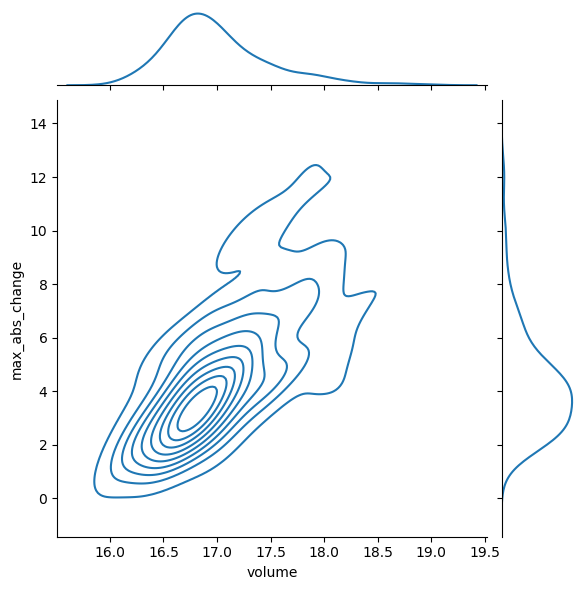

In [14]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

#### Regression plots

We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high stock price - daily low stock price). To do so, we first need to isolate this data:

In [15]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:, -2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy in Python with `itertools`, so let's import it:

In [26]:
import itertools

`itertools` gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from `itertools`; notice how the second loop doesn't do anything:

In [27]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'--> {i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'--> {i}')

--> I'm an iterator
This printed once because the iterator has been exhausted


Iterables are objects that can be iterated over. When entering a loop, an iterator is made from the iterable to handle the iteration. Iterators are iterables, but not all iterables are iterators. A list is an iterable. If we turn that iterator into an iterable (a list in this case), the second loop runs:

In [32]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
    print(f'--> {i}')
print('This prints again because it is an iterable:')
for i in iterable:
    print(f'--> {i}')

--> I'm an iterable
This prints again because it is an iterable:
--> I'm an iterable


The `reg_resid_plots()` function from the `reg_resid_plot.py` module in this folder uses `regplot()` and `residplot()` from seaborn along with `itertools` to plot the regression and residuals side-by-side:

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement reg_resid_plot (from versions: none)
ERROR: No matching distribution found for reg_resid_plot


C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


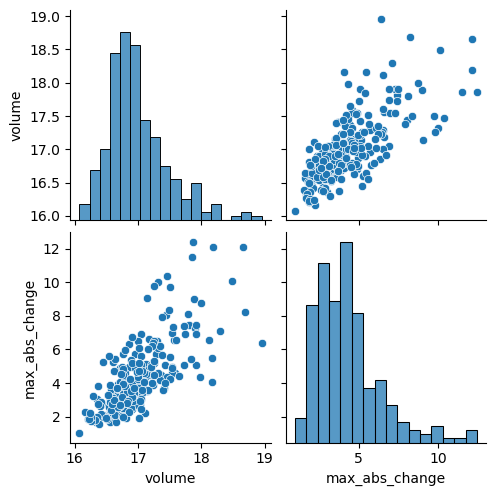

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


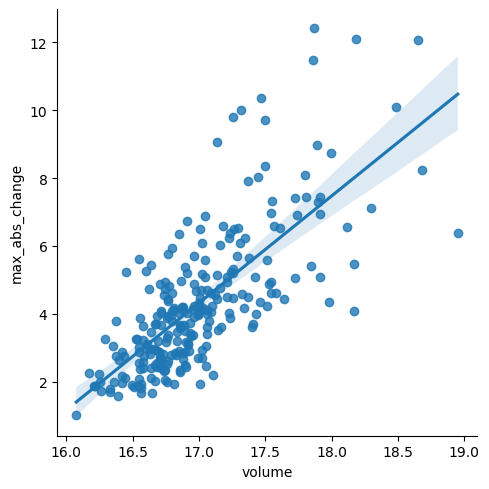

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


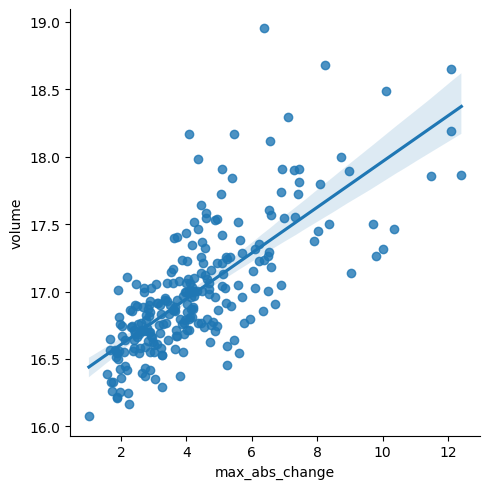

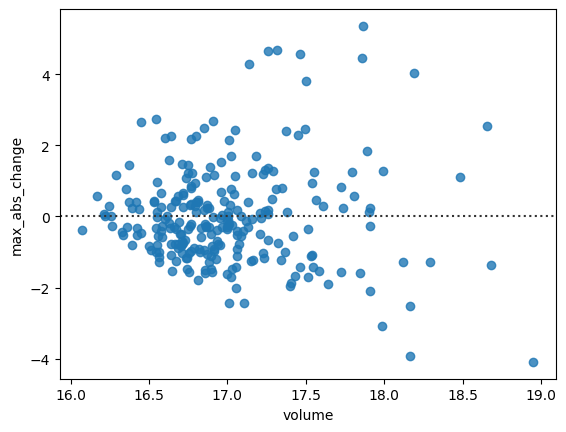

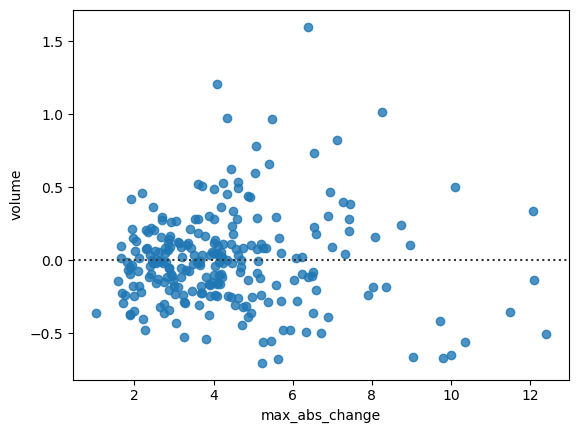

In [36]:
from reg_resid_plot import reg_resid_plots
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:, -2:]

reg_resid_plots(fb_reg_data)


We can use `lmplot()` to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


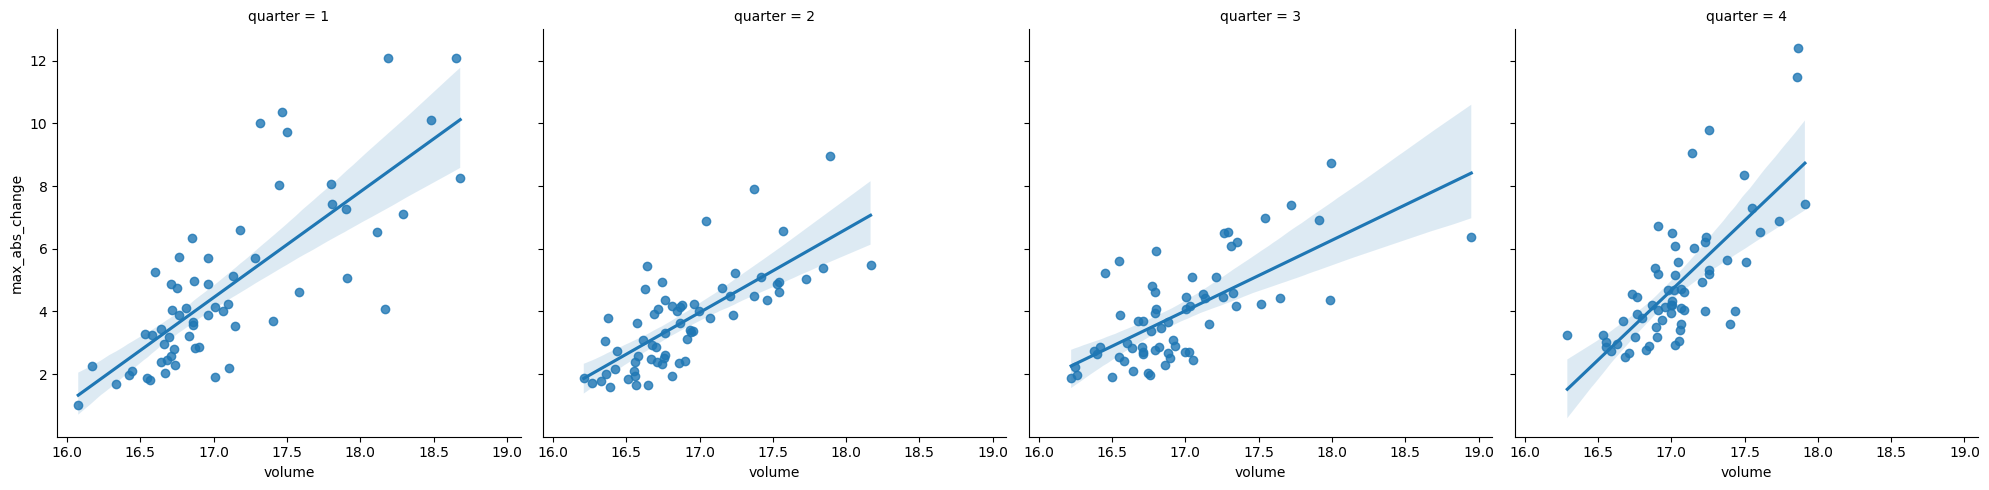

In [19]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

#### Distributions

Seaborn provides some new plot types for visualizing distributions in addition to its own versions of the plot types we discussed in chapter 5 (in this notebook).

#### boxenplot()

The boxenplot is a box plot that shows additional quantiles:

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

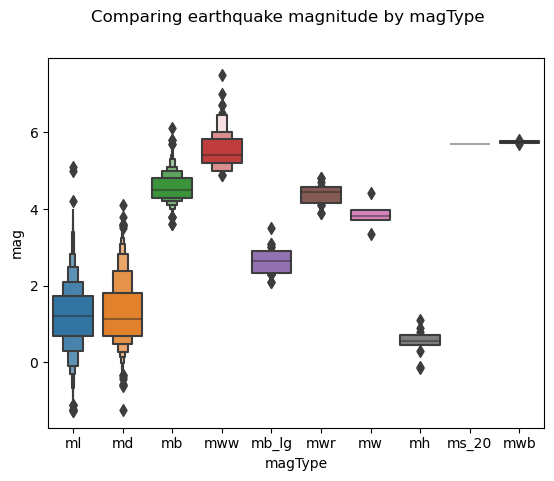

In [20]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

#### violinplot()

Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

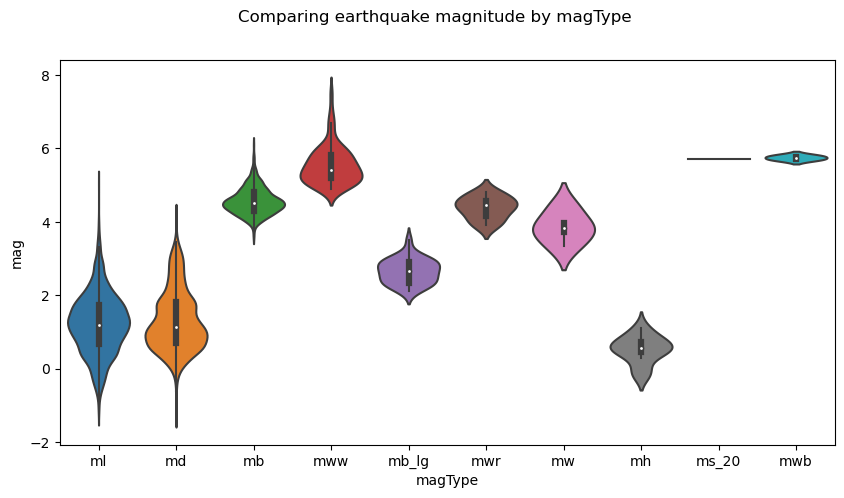

In [21]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
    ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

#### Faceting

We can create subplots across subsets of our data by faceting. First, we create a `FacetGrid` specifying how to layout the plots (which categorical column goes along the rows and which one along the columns). Then, we call the `map()` method of the `FacetGrid` and pass in the plotting function we want to use (along with any additional arguments).

Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed:

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


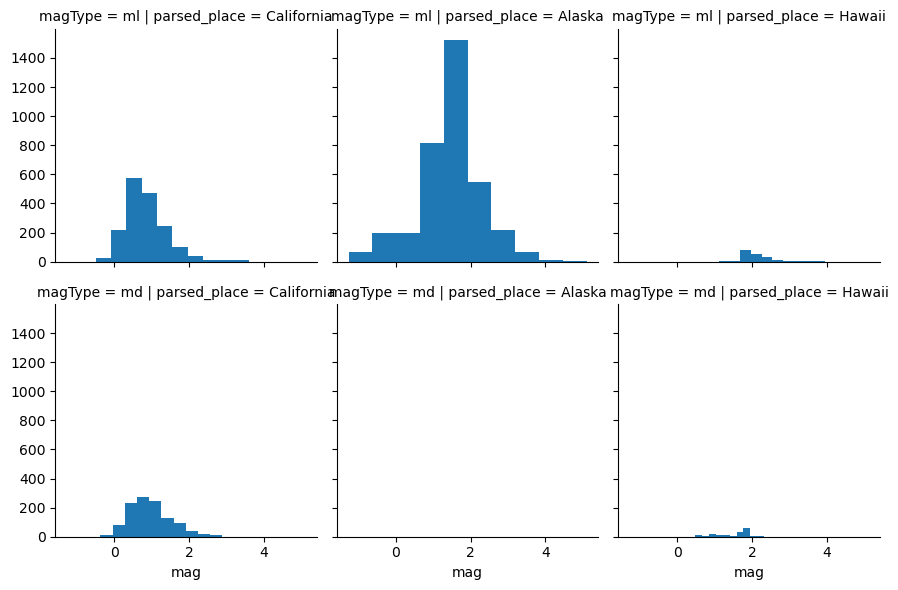

In [37]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California', 'Alaska', 'Hawaii'
        ])) & (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType',
    col='parsed_place'
)
g = g.map(plt.hist, 'mag')


## 9.2.2 Formatting Plots

#### About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the `stock_analysis` package).

#### Setup

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

#### Titles and Axis Labels

- `plt.suptitle()` adds a title to plots and subplots.
- `plt.title()` adds a title to a single plot. Note if you use subplots, it will only put the title on the last subplot, so you will need to use `plt.suptitle()`.
- `plt.xlabel()` labels the x-axis.
- `plt.ylabel()` labels the y-axis.

Text(0, 0.5, 'price ($)')

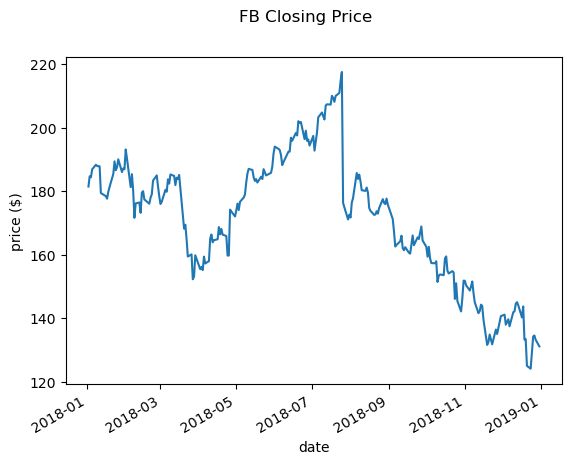

In [40]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

#### `plt.suptitle()` vs. `plt.title()`

Check out what happens when we call `plt.title()` with subplots:

Text(0, 0.5, 'price ($)')

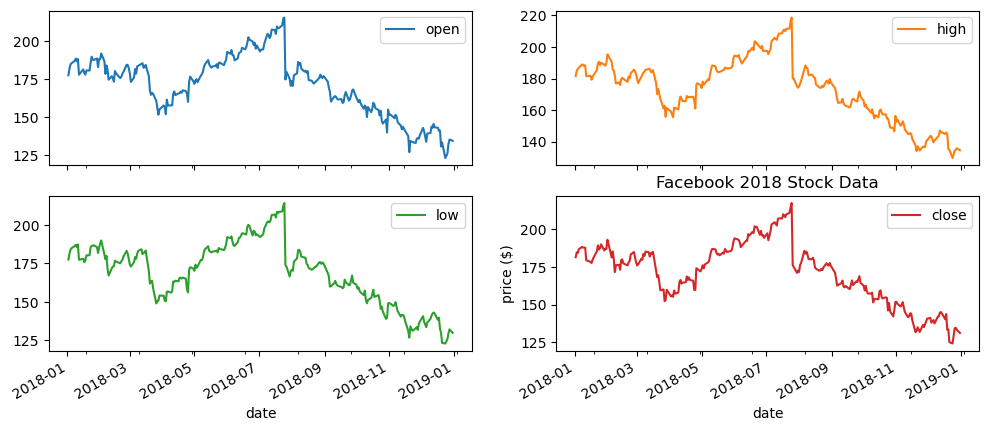

In [41]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Simply getting into the habit of using `plt.suptitle()` instead of `plt.title()` will save you this confusion:

Text(0, 0.5, 'price ($)')

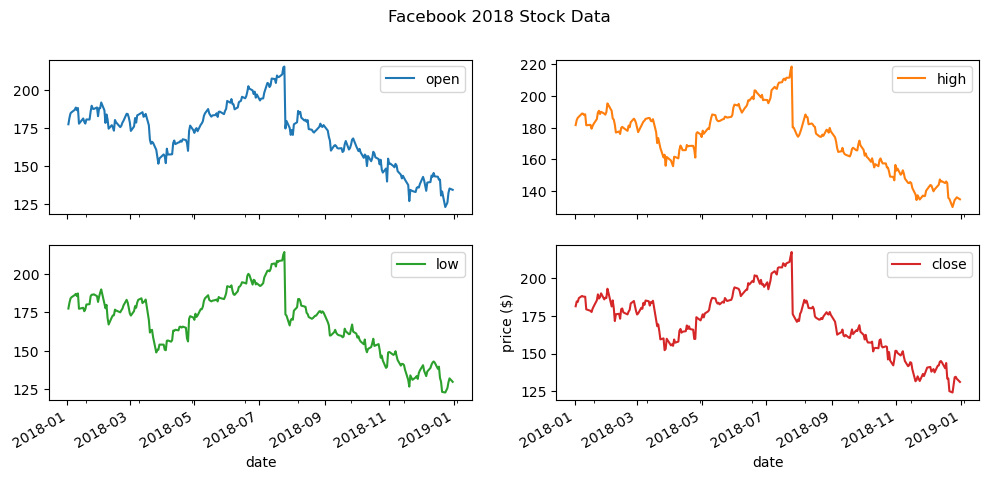

In [42]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

#### Legends

`plt.legend()` adds a legend to the plot. We can specify where to place it with the `loc` parameter:

Text(0, 0.5, 'price ($)')

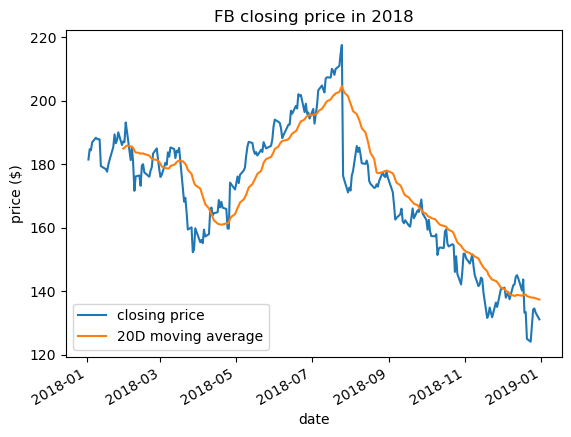

In [43]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'], 
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

#### Formatting Axes

##### Specifying axis limits

`plt.xlim()` and `plt.ylim()` can be used to specify the minimum and maximum values for the axis. Passing `None` will have matplotlib determine the limit.

Text(0, 0.5, 'price ($)')

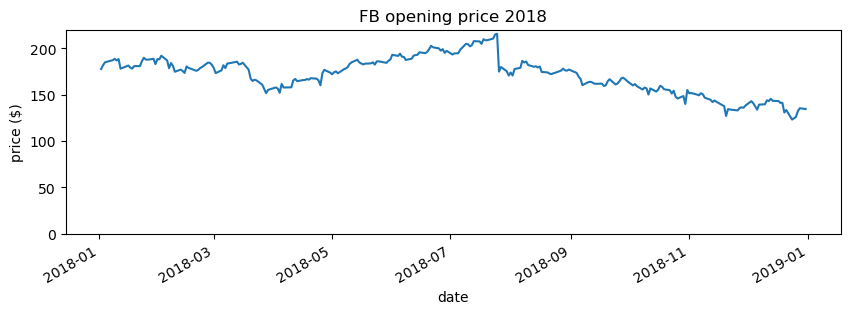

In [44]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

##### Formatting the Axis Ticks

We can use `plt.xticks()` and `plt.yticks()` to provide tick labels and specify which ticks to show. Here, we show every other month:

Text(0, 0.5, 'price ($)')

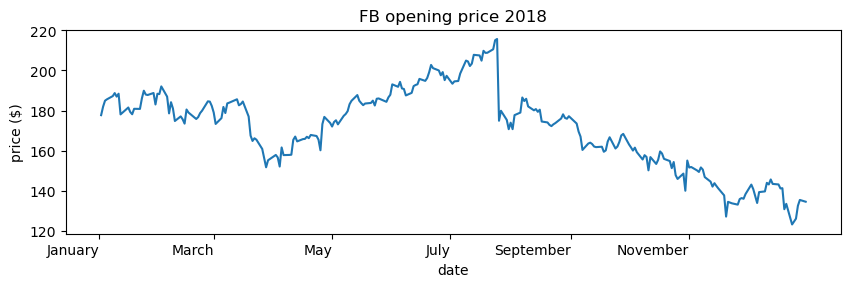

In [52]:
import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()

num_labels = len(calendar.month_name[1::2])
adjusted_locs = locs[:num_labels]

plt.xticks(adjusted_locs, calendar.month_name[1:num_labels*2:2])
plt.ylabel('price ($)')


##### PercentFormatter

We can use `ticker.PercentFormatter` and specify the denominator (`xmax`) to use when calculating the percentages. This gets passed to the `set_major_formatter()` method of the `xaxis` or `yaxis` on the Axes.

Text(0, 0.5, 'percent of highest price ($218.62)')

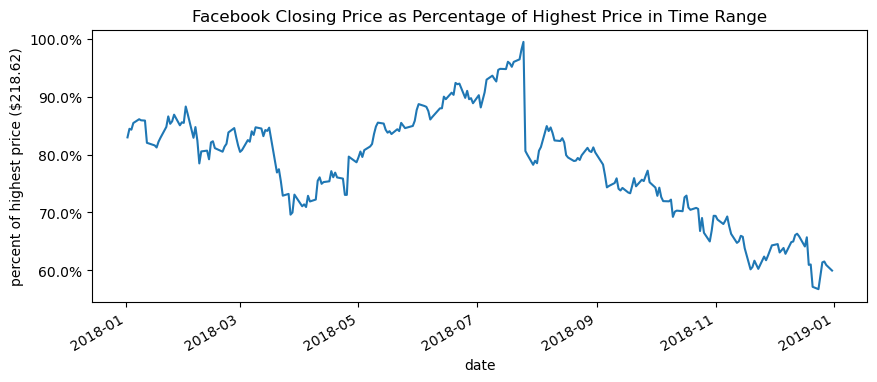

In [46]:
import matplotlib.ticker as ticker

ax = fb.close.plot(
    figsize=(10, 4), 
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
    fb.high.max() * pct for pct in np.linspace(0.6, 1, num=5)
])  # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

##### MultipleLocator

If we don't want to show decimal values on the x-axis, we can use the `MultipleLocator`. This will give ticks for all multiples of a number specified with the base parameter. To get integer values, we use `base=1`:

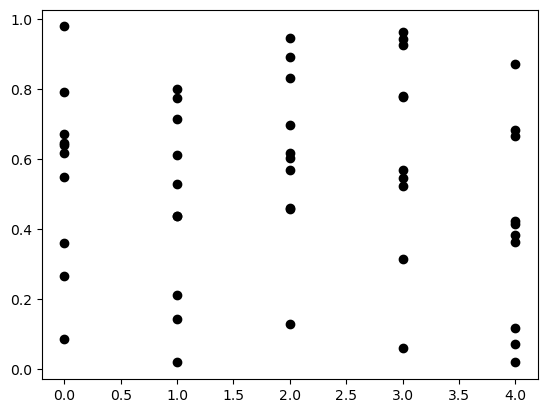

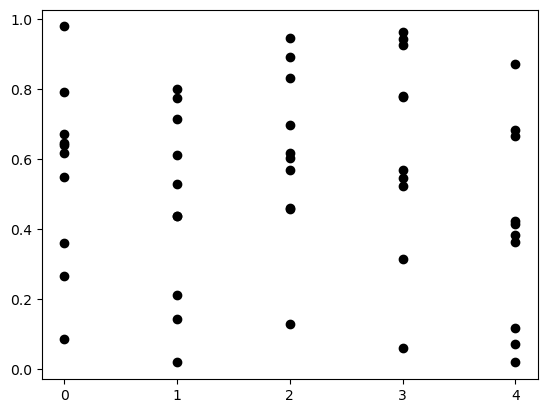

In [47]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')



fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1)
)

## 9.2.3 Customizing Visualizations


Pandas provides some extra plotting functions for a few select plot types.

### About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the `stock_analysis` package).

### Setup


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

In [ ]:
### Scatter Matrix

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

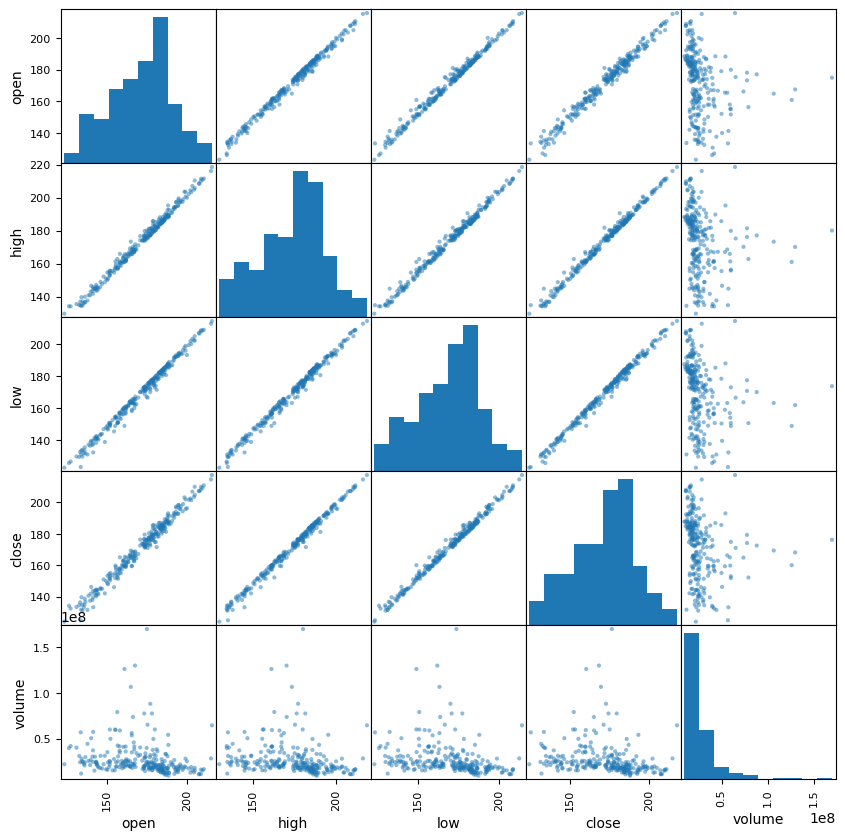

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

### Changing the Diagonal from Histograms to KDE

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

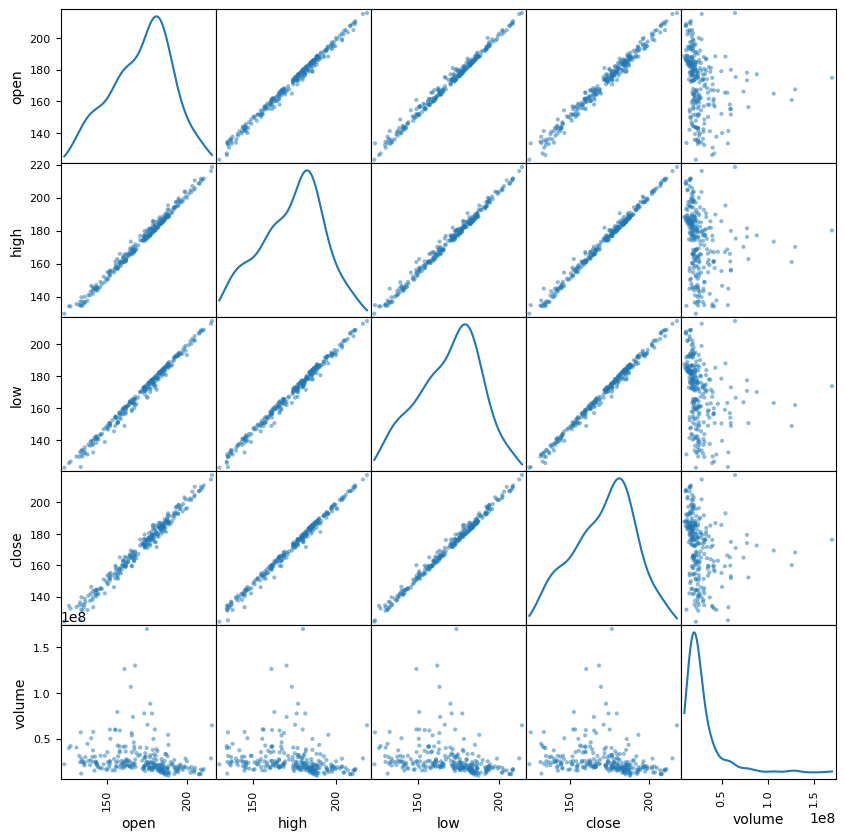

In [56]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

### Lag Plot

Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

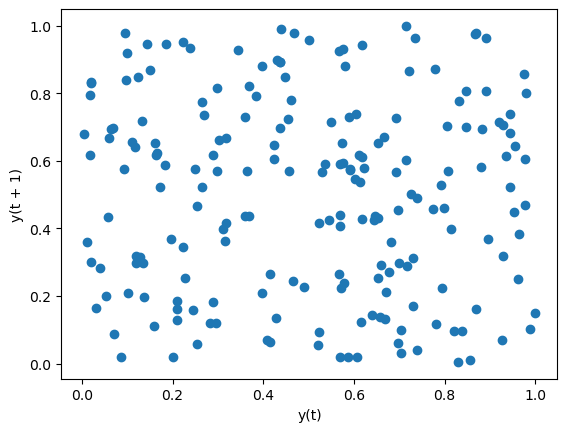

In [57]:
from pandas.plotting import lag_plot
np.random.seed(0)  # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

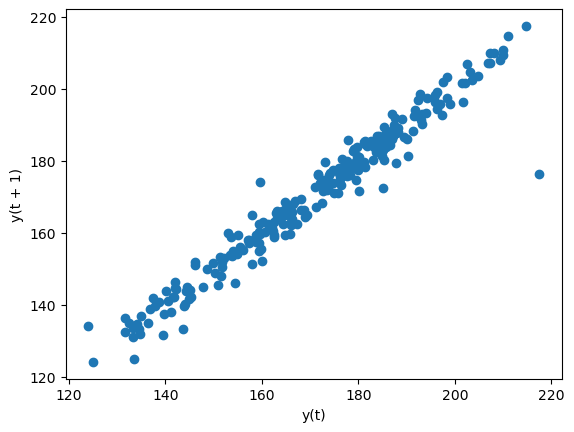

In [58]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the `lag` parameter. Let's look at a 5-day lag (a week of trading activity):

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

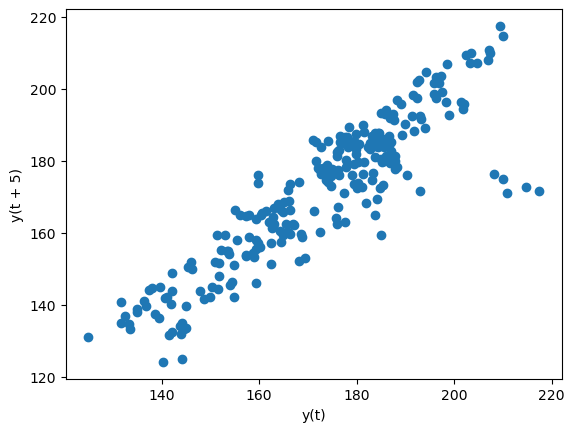

In [59]:
lag_plot(fb.close, lag=5)

### Autocorrelation Plots

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

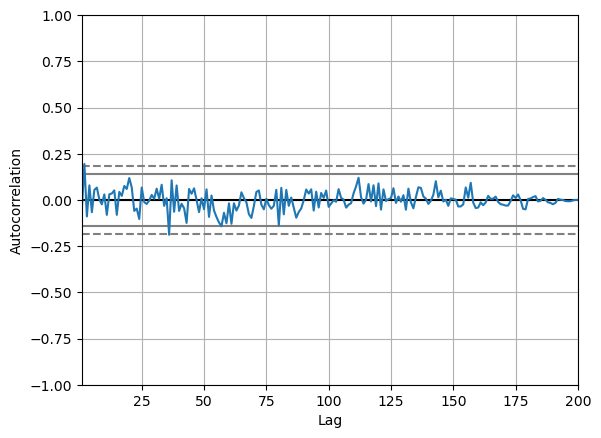

In [60]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0)  # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

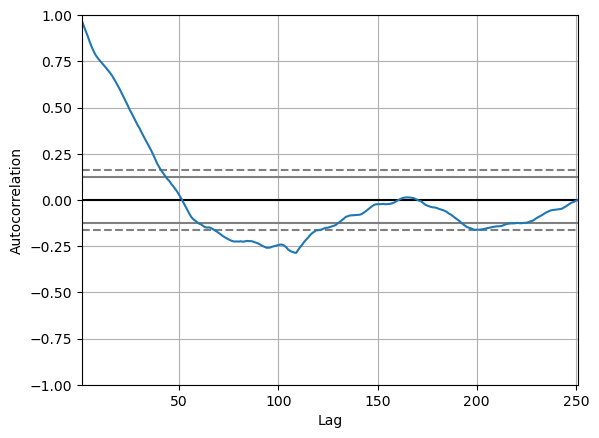

In [61]:
autocorrelation_plot(fb.close)

### Bootstrap Plot

This plot helps us understand the uncertainty in our summary statistics:

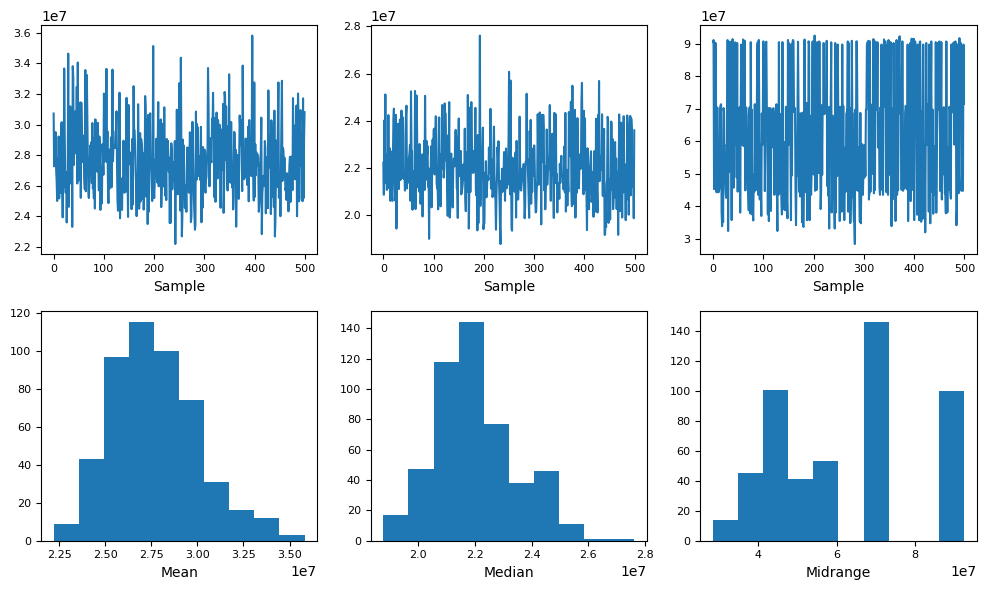

In [62]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# Data Analysis



Facebook's stock price in 2018 showed significant fluctuations, reflecting the company's performance and market reactions throughout the year. A closer look at the opening prices reveals periods of stability interspersed with sharp increases and decreases. By plotting the data, we can observe patterns that might correlate with major events or announcements by Facebook. The visualization aids in understanding the overall trend and specific points of interest, such as peak prices and sudden drops.








# Supplementary Activity

#### 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the `magType` of `mb`.

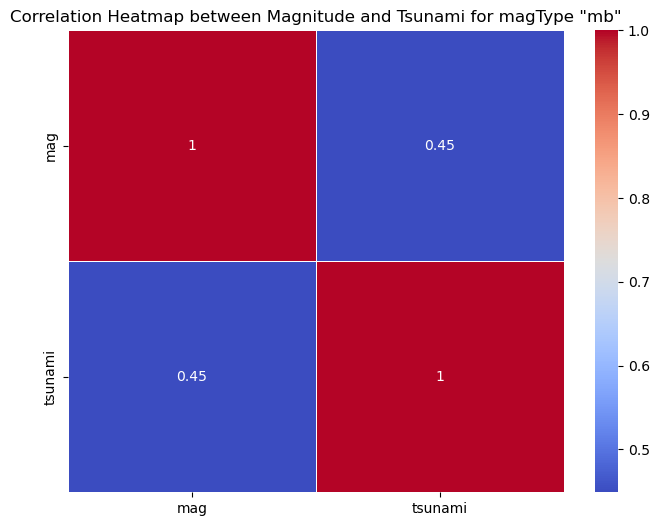

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load earthquake data
quakes = pd.read_csv('earthquakes.csv')

# Filter data for magType 'mb'
filtered_quakes = quakes[quakes['magType'] == 'mb']

# Calculate correlation matrix
corr_matrix = filtered_quakes[['mag', 'tsunami']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Magnitude and Tsunami for magType "mb"')
plt.show()

#### 2. Create a box plot of Facebookm volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the `quantile()` method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

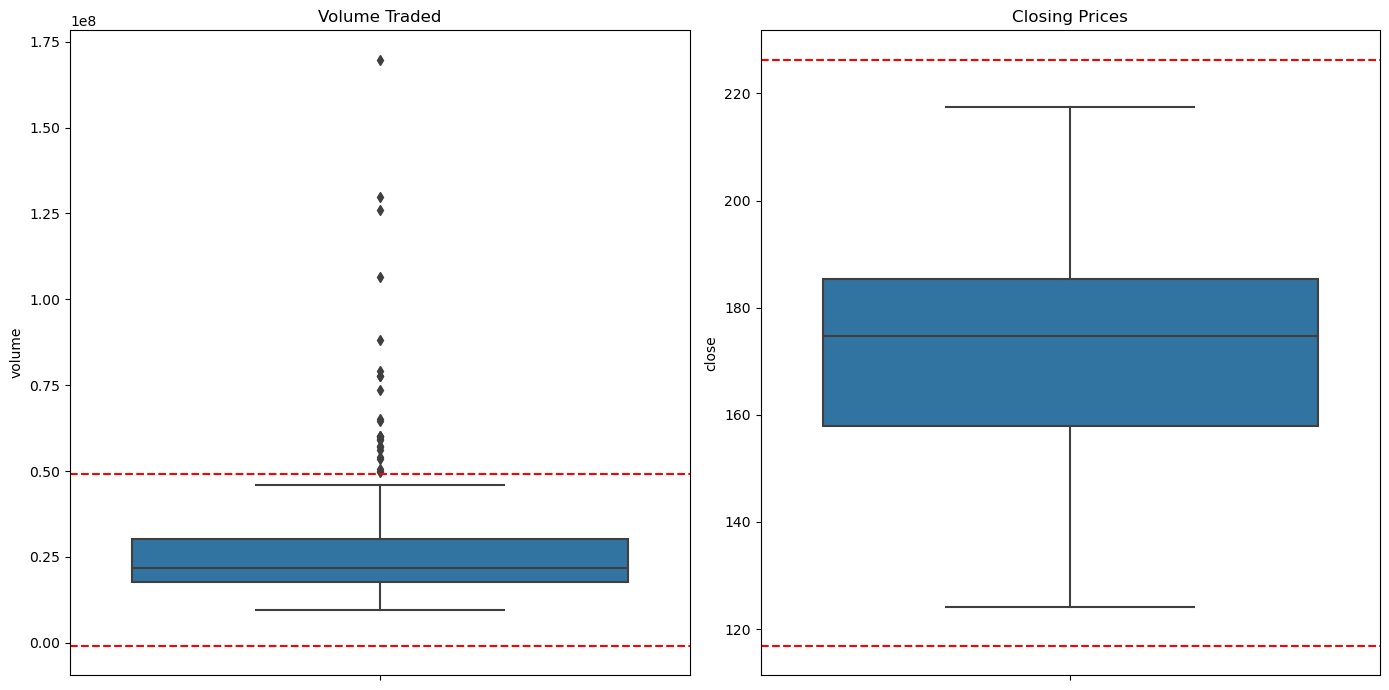

In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Facebook stock data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Calculate quantiles and IQR for volume and closing price
q1_volume = fb['volume'].quantile(0.25)
q3_volume = fb['volume'].quantile(0.75)
iqr_volume = q3_volume - q1_volume
lower_bound_volume = q1_volume - 1.5 * iqr_volume
upper_bound_volume = q3_volume + 1.5 * iqr_volume

q1_close = fb['close'].quantile(0.25)
q3_close = fb['close'].quantile(0.75)
iqr_close = q3_close - q1_close
lower_bound_close = q1_close - 1.5 * iqr_close
upper_bound_close = q3_close + 1.5 * iqr_close

# Create box plot with reference lines
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.boxplot(y=fb['volume'], ax=axes[0])
axes[0].axhline(lower_bound_volume, color='r', linestyle='--')
axes[0].axhline(upper_bound_volume, color='r', linestyle='--')
axes[0].set_title('Volume Traded')

sns.boxplot(y=fb['close'], ax=axes[1])
axes[1].axhline(lower_bound_close, color='r', linestyle='--')
axes[1].axhline(upper_bound_close, color='r', linestyle='--')
axes[1].set_title('Closing Prices')

plt.tight_layout()
plt.show()

#### 3. Fill in the area between the bounds in the plot from exercise #2.

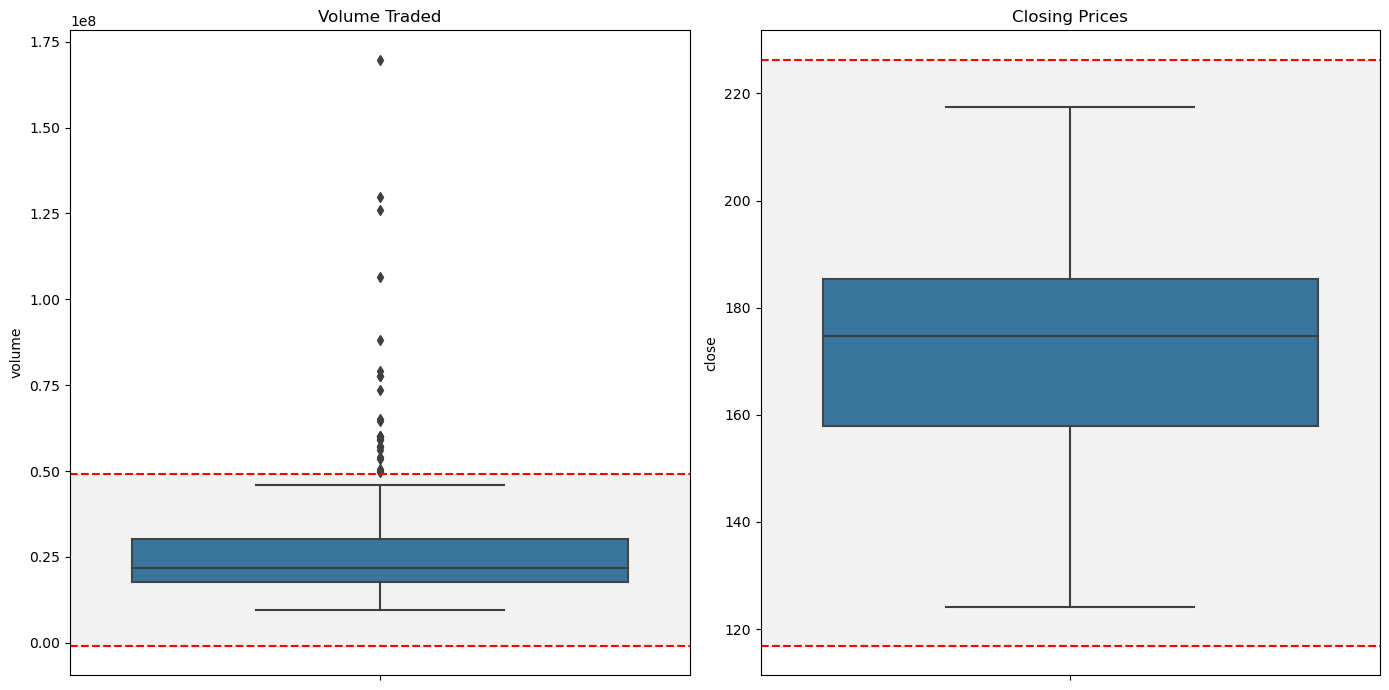

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Facebook stock data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Calculate quantiles and IQR for volume and closing price
q1_volume = fb['volume'].quantile(0.25)
q3_volume = fb['volume'].quantile(0.75)
iqr_volume = q3_volume - q1_volume
lower_bound_volume = q1_volume - 1.5 * iqr_volume
upper_bound_volume = q3_volume + 1.5 * iqr_volume

q1_close = fb['close'].quantile(0.25)
q3_close = fb['close'].quantile(0.75)
iqr_close = q3_close - q1_close
lower_bound_close = q1_close - 1.5 * iqr_close
upper_bound_close = q3_close + 1.5 * iqr_close

# Create box plot with filled area
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.boxplot(y=fb['volume'], ax=axes[0])
axes[0].axhline(lower_bound_volume, color='r', linestyle='--')
axes[0].axhline(upper_bound_volume, color='r', linestyle='--')
axes[0].fill_betweenx([lower_bound_volume, upper_bound_volume], axes[0].get_xlim()[0], axes[0].get_xlim()[1], color='grey', alpha=0.1)
axes[0].set_title('Volume Traded')

sns.boxplot(y=fb['close'], ax=axes[1])
axes[1].axhline(lower_bound_close, color='r', linestyle='--')
axes[1].axhline(upper_bound_close, color='r', linestyle='--')
axes[1].fill_betweenx([lower_bound_close, upper_bound_close], axes[1].get_xlim()[0], axes[1].get_xlim()[1], color='grey', alpha=0.1)
axes[1].set_title('Closing Prices')

plt.tight_layout()
plt.show()

#### 4. `Use axvspan()` to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

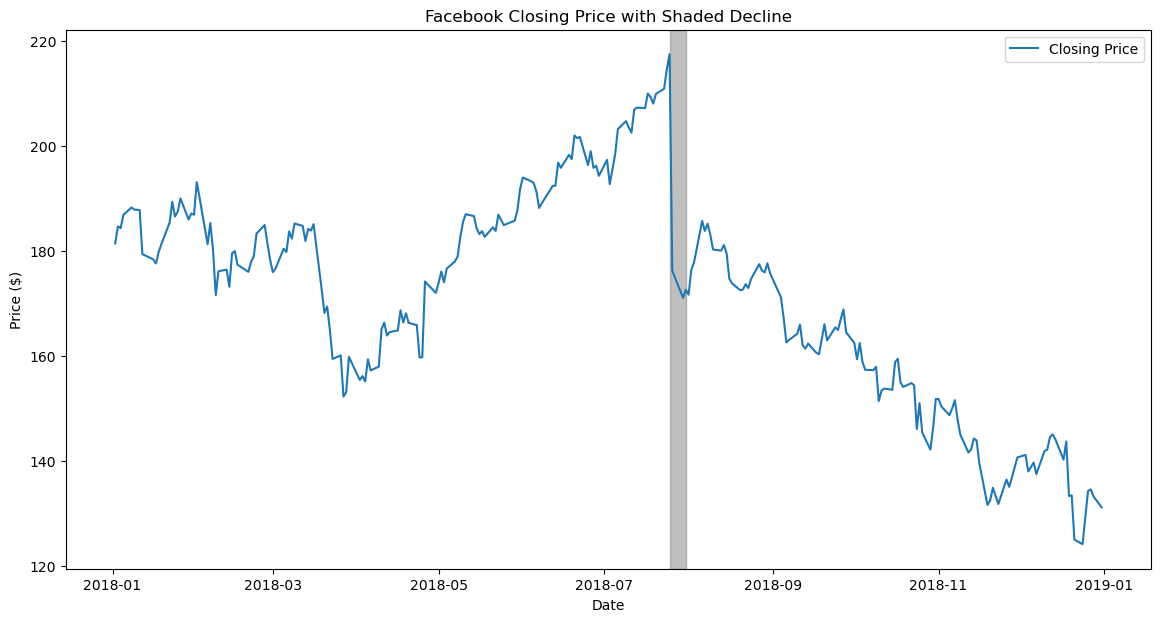

In [66]:
# Load Facebook stock data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Create line plot with shaded area
plt.figure(figsize=(14, 7))
plt.plot(fb['close'], label='Closing Price')
plt.axvspan('2018-07-25', '2018-07-31', color='grey', alpha=0.5)
plt.title('Facebook Closing Price with Shaded Decline')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

#### 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
   - Disappointing user growth announced after close on July 25, 2018
   - Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
   - FTC launches investigation on March 20, 2018

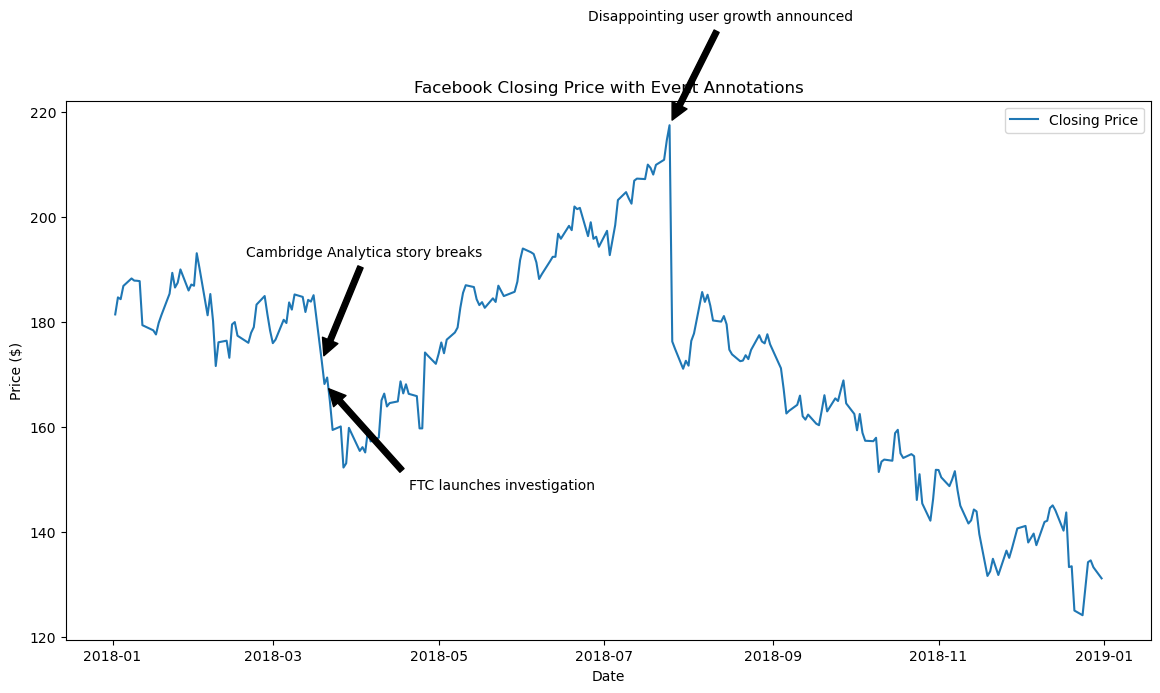

In [69]:
# Load Facebook stock data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Ensure the dates are parsed correctly
fb.index = pd.to_datetime(fb.index)

# Create line plot with annotations
plt.figure(figsize=(14, 7))
plt.plot(fb['close'], label='Closing Price')

# Add annotations
plt.annotate('Disappointing user growth announced', xy=(pd.Timestamp('2018-07-25'), fb.loc['2018-07-25', 'close']),
             xytext=(pd.Timestamp('2018-06-25'), fb.loc['2018-07-25', 'close'] + 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cambridge Analytica story breaks', xy=(pd.Timestamp('2018-03-19'), fb.loc['2018-03-19', 'close']),
             xytext=(pd.Timestamp('2018-02-19'), fb.loc['2018-03-19', 'close'] + 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('FTC launches investigation', xy=(pd.Timestamp('2018-03-20'), fb.loc['2018-03-20', 'close']),
             xytext=(pd.Timestamp('2018-04-20'), fb.loc['2018-03-20', 'close'] - 20),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Facebook Closing Price with Event Annotations')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


#### 6. Modify the `reg_resid_plots()` function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


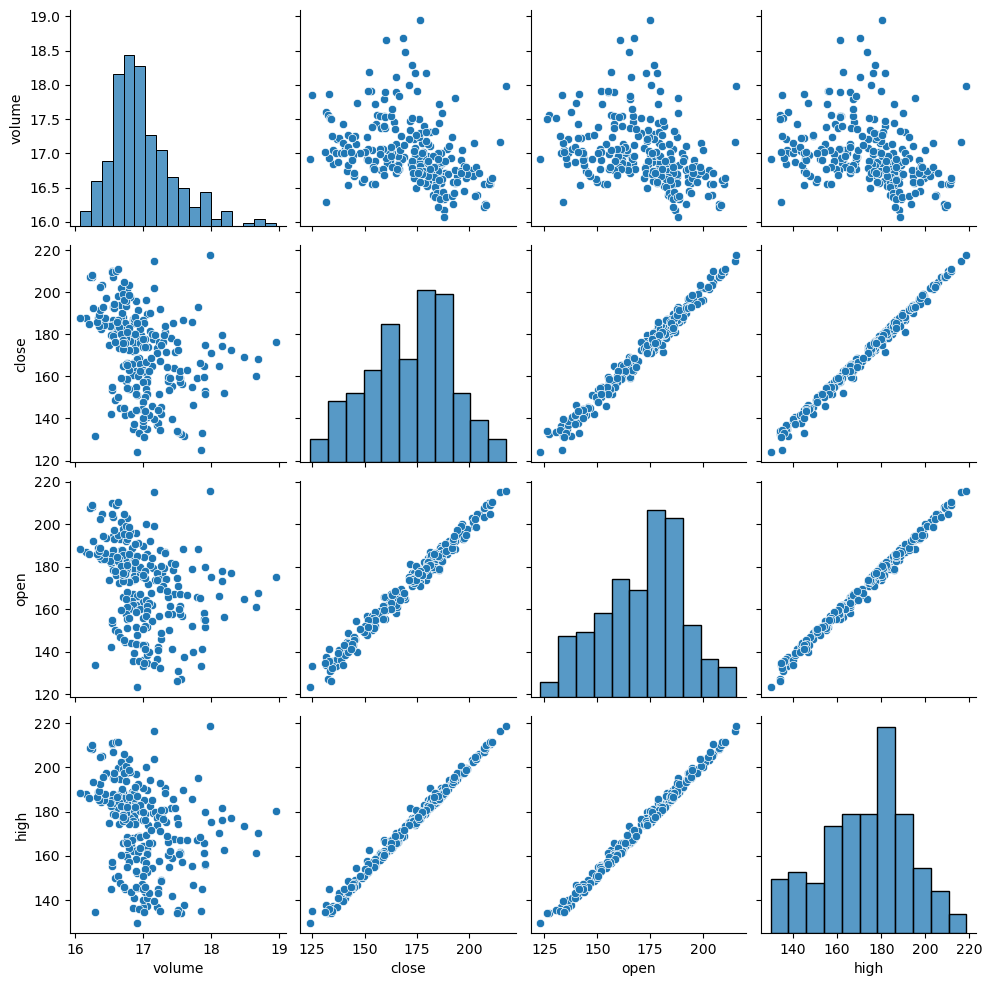

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


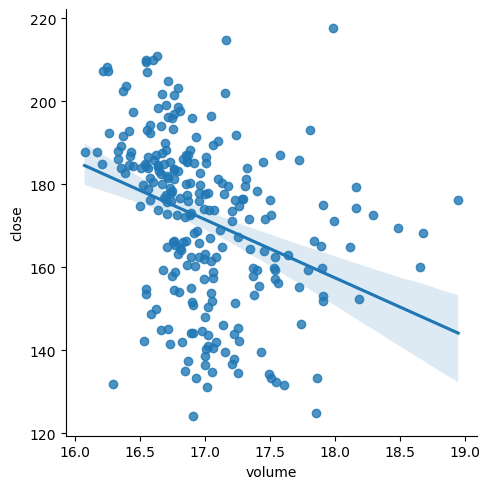

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


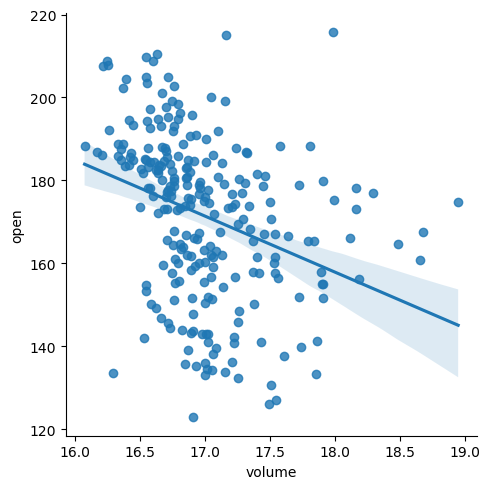

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


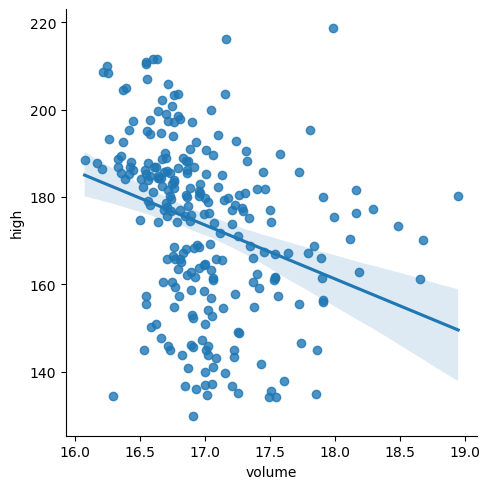

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


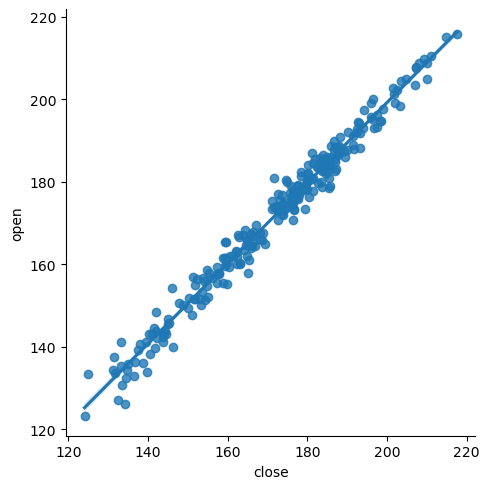

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


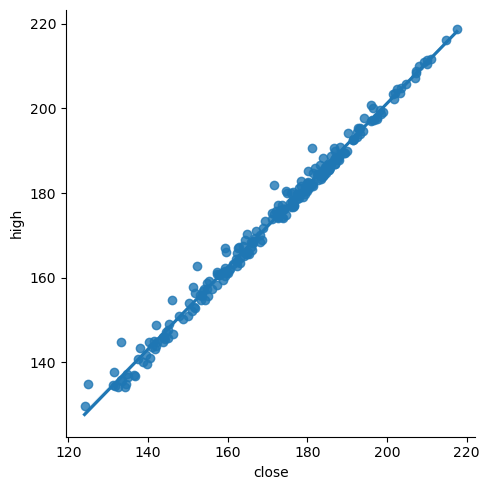

C:\Users\ryzek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


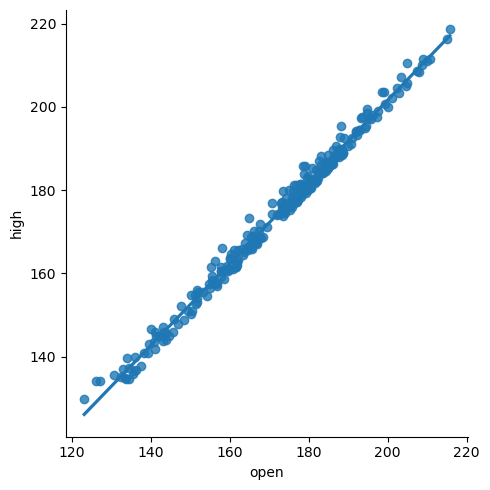

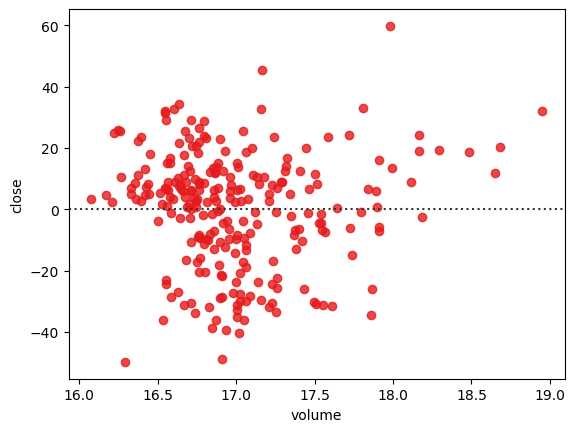

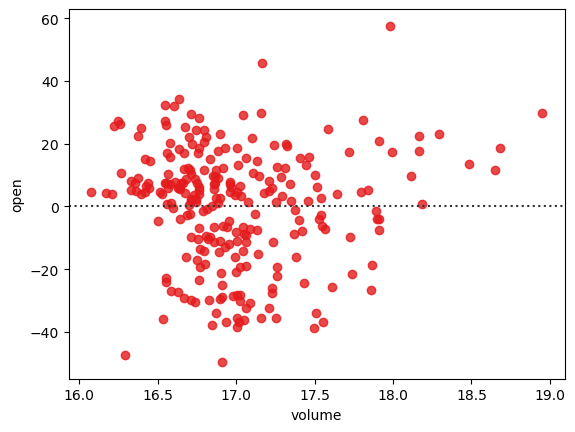

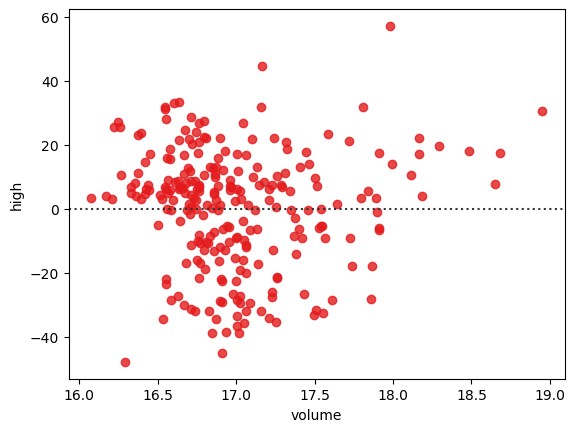

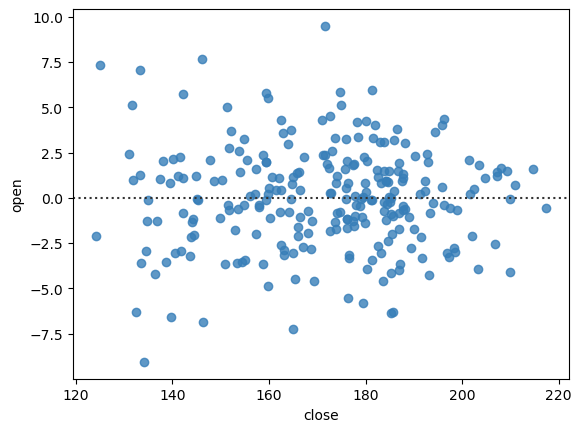

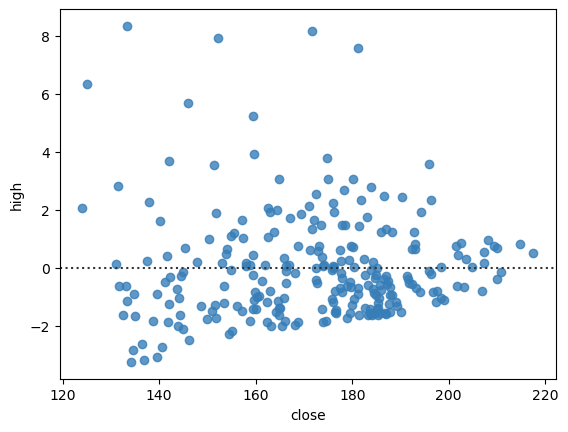

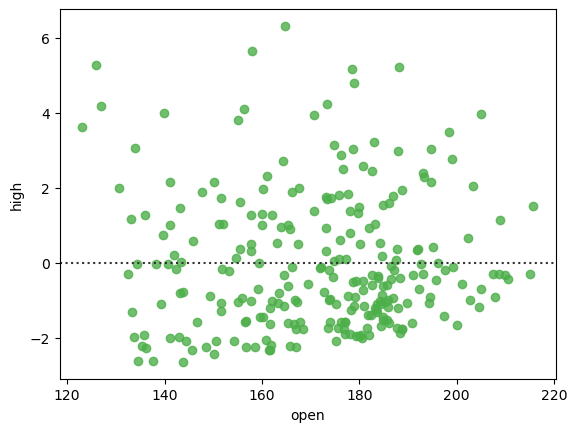

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from matplotlib.colors import ListedColormap

def reg_resid_plots(data):
    # Create a colormap
    cmap = ListedColormap(sns.color_palette("Set1", n_colors=len(data.columns)).as_hex())

    # Create a pair plot to visualize the relationships
    sns.pairplot(data)
    plt.show()

    # Plot regression plot for each pair of columns
    columns = data.columns
    for col1, col2 in itertools.combinations(columns, 2):
        sns.lmplot(x=col1, y=col2, data=data)
        plt.show()

    # Plot residual plots for each pair of columns
    for col1, col2 in itertools.combinations(columns, 2):
        sns.residplot(x=col1, y=col2, data=data, color=cmap.colors[columns.get_loc(col1) % len(cmap.colors)])
        plt.show()

# Example usage with Facebook data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb_reg_data = fb[['volume', 'close', 'open', 'high', 'low']].assign(
    volume=np.log(fb['volume'])
).iloc[:, :-1]

reg_resid_plots(fb_reg_data)


# Summary
In this activity, we used seaborn to visualize data correlations, created box plots with Tukey fences, and highlighted significant data points on plots. We also shaded specific regions on line plots and annotated key events in Facebook's stock history. Lastly, we modified a plotting function to utilize a colormap for better visual distinction. This exercise demonstrated various data visualization techniques to uncover patterns and insights in data.